In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn.objects as so
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor


from collections import Counter
from scipy.stats import chi2_contingency
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Preprocesamiento de Datos

## Calidad de Aire

In [2]:
calidad_aire = pd.read_csv('CalidadAire.csv')

In [3]:
calidad_aire.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,3/10/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,3/10/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,3/10/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,3/10/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,3/10/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [4]:
calidad_aire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


Información de los Datos:

<ol>
    <li>Date (DD/MM/YYYY)</li>
    <li>Time (HH.MM.SS)</li>
    <li>True hourly averaged concentration CO in mg/m^3 (reference analyzer)</li>
    <li>PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)</li>
    <li>True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)</li>
    <li>True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)</li>
    <li>PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)</li>
    <li>True hourly averaged NOx concentration in ppb (reference analyzer)</li>
    <li>PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)</li>
    <li>True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)</li>
    <li>PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)</li>
    <li>PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)</li>
    <li>Temperature in Â°C</li>
    <li>Relative Humidity (%)</li>
    <li>AH Absolute Humidity</li>
</ol>


En primera instancia se puede notar que las últimas 2 columnas no tienen ningún dato por lo que se deben de eliminar. Ahora se procederá con la eliminación de datos nulos.

In [5]:
calidad_aire_preprocesado = calidad_aire.drop(['Unnamed: 15', 'Unnamed: 16'], axis=1)

In [6]:
del calidad_aire

In [7]:
calidad_aire_preprocesado.isnull().sum()

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

In [8]:
calidad_aire_preprocesado.dropna(inplace=True)

In [9]:
calidad_aire_preprocesado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [10]:
(calidad_aire_preprocesado == 0).any()

Date             False
Time             False
CO(GT)           False
PT08.S1(CO)      False
NMHC(GT)         False
C6H6(GT)         False
PT08.S2(NMHC)    False
NOx(GT)          False
PT08.S3(NOx)     False
NO2(GT)          False
PT08.S4(NO2)     False
PT08.S5(O3)      False
T                 True
RH               False
AH               False
dtype: bool

La única característica con valores de 0 es la de temperatura (T), pero en este caso es un valor permitido y no fuera de lo común.

In [11]:
calidad_aire_preprocesado.describe(include='all')

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357,9357,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
unique,391,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,4/3/2005,18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,24,390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,NaN,NaN,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,NaN,NaN,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,NaN,NaN,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,NaN,NaN,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,NaN,NaN,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200


Se puede ver que todas las columnas tienen un valor mínimo de -200, y el hecho de que estas unidades no deberían ser negativas en ningún caso, se podría asumir que es un error del sensor o un código nulo, se debe examinar cómo se propaga este valor en el set de datos. Se calcula la cantidad de instancias en la que esto ocurre por cada columna

In [12]:
for column in calidad_aire_preprocesado.columns:
    print(f'{column}: {calidad_aire_preprocesado.loc[calidad_aire_preprocesado[column] == -200, column].count()}')

Date: 0
Time: 0
CO(GT): 1683
PT08.S1(CO): 366
NMHC(GT): 8443
C6H6(GT): 366
PT08.S2(NMHC): 366
NOx(GT): 1639
PT08.S3(NOx): 366
NO2(GT): 1642
PT08.S4(NO2): 366
PT08.S5(O3): 366
T: 366
RH: 366
AH: 366


En primer lugar se nota que la columna "NMHC(GT)" tiene una gran cantidad de instancias con este valor, por lo que es un feature que no va a generar gran utilidad para el modelo. 

En segundo lugar, se puede ver que el target feature "CO(GT)" tiene 1683 instancias con este valor, lo cual indica que se deben eliminar estas ya que no van a servir porque se necesitan esos datos para analizar el desempeño del modelo.

En tercer lugar, se nota que hay 9 features con 366 instancias que contienen este valor, esto indica que probablemente sean las mismas instancias a las que se refieren, por lo que habría que eliminarlas ya que son instancias con muy pocos datos, y no representan gran tamaño con respecto a todo el set de datos. Pero para no "suponer" que las 366 intancias son todas las mismas, se procede a probar esto posterior a eliminar las intancias que no contienen valor para el target feature, porque es posible que entre ellas estén las 366 de que no tienen valor para las demás columnas

In [13]:
calidad_aire_preprocesado.drop("NMHC(GT)", axis=1,inplace=True)

In [14]:
codigo_nulo = -200
condition = calidad_aire_preprocesado[['CO(GT)']].eq(codigo_nulo).all(axis=1)

In [15]:
calidad_aire_preprocesado = calidad_aire_preprocesado[~condition]
del condition

In [16]:
null_masks = {}
for col in ['PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']:
    null_masks[col] = calidad_aire_preprocesado[col] == codigo_nulo

all_same = all(null_masks[list(null_masks.keys())[0]].equals(mask) 
               for mask in null_masks.values())

print(f"Las columnas comparten la misma fila con el valor -200: {all_same}")

Las columnas comparten la misma fila con el valor -200: True


In [17]:
condition = calidad_aire_preprocesado[['PT08.S2(NMHC)']].eq(codigo_nulo).all(axis=1)

In [18]:
calidad_aire_preprocesado = calidad_aire_preprocesado[~condition]
del condition

In [19]:
for column in calidad_aire_preprocesado.columns:
    print(f'{column}: {calidad_aire_preprocesado.loc[calidad_aire_preprocesado[column] == -200, column].count()}')

Date: 0
Time: 0
CO(GT): 0
PT08.S1(CO): 0
C6H6(GT): 0
PT08.S2(NMHC): 0
NOx(GT): 400
PT08.S3(NOx): 0
NO2(GT): 403
PT08.S4(NO2): 0
PT08.S5(O3): 0
T: 0
RH: 0
AH: 0


Ahora únicamente las columnas "NOx(GT)" y "NO2(GT)" tienen ese valor de -200 en 403 y 400 instancias, respectivamente. Como esta cantidad representa alrededor de un 5% de la cantidad de datos, se puede imputar el valor de la media en para esos casos sin arriesgar un sesgo significante en los datos.

In [20]:
mean_nox = calidad_aire_preprocesado.loc[calidad_aire_preprocesado['NOx(GT)'] != -200, 'NOx(GT)'].mean()
mean_no2 = calidad_aire_preprocesado.loc[calidad_aire_preprocesado['NO2(GT)'] != -200, 'NO2(GT)'].mean()

In [21]:
calidad_aire_preprocesado.loc[:, 'NOx(GT)'] = calidad_aire_preprocesado['NOx(GT)'].replace(-200, mean_nox)
calidad_aire_preprocesado.loc[:, 'NO2(GT)'] = calidad_aire_preprocesado['NO2(GT)'].replace(-200, mean_no2)

Ahora se procede a visualizar la distribución de los datos numéricos del conjunto de datos.

In [22]:
calidad_aire_num = calidad_aire_preprocesado.select_dtypes(include=[np.number])

array([[<Axes: title={'center': 'CO(GT)'}>,
        <Axes: title={'center': 'PT08.S1(CO)'}>,
        <Axes: title={'center': 'C6H6(GT)'}>],
       [<Axes: title={'center': 'PT08.S2(NMHC)'}>,
        <Axes: title={'center': 'NOx(GT)'}>,
        <Axes: title={'center': 'PT08.S3(NOx)'}>],
       [<Axes: title={'center': 'NO2(GT)'}>,
        <Axes: title={'center': 'PT08.S4(NO2)'}>,
        <Axes: title={'center': 'PT08.S5(O3)'}>],
       [<Axes: title={'center': 'T'}>, <Axes: title={'center': 'RH'}>,
        <Axes: title={'center': 'AH'}>]], dtype=object)

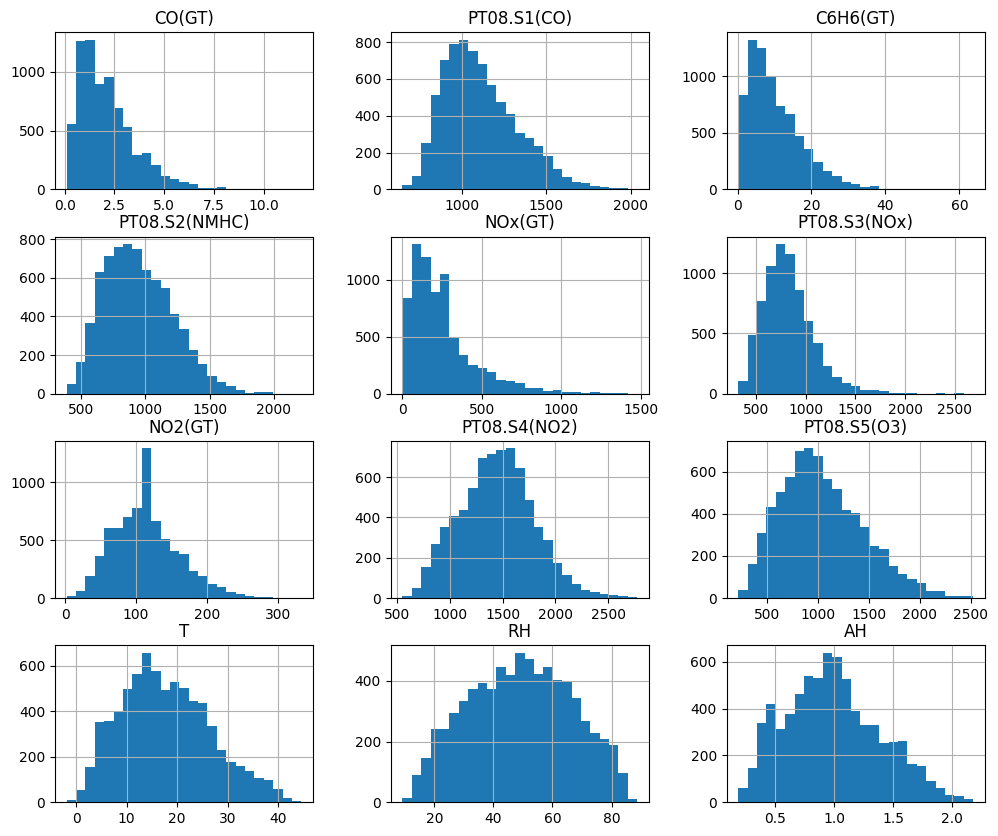

In [23]:
calidad_aire_num.hist(bins=25, figsize=(12, 10))

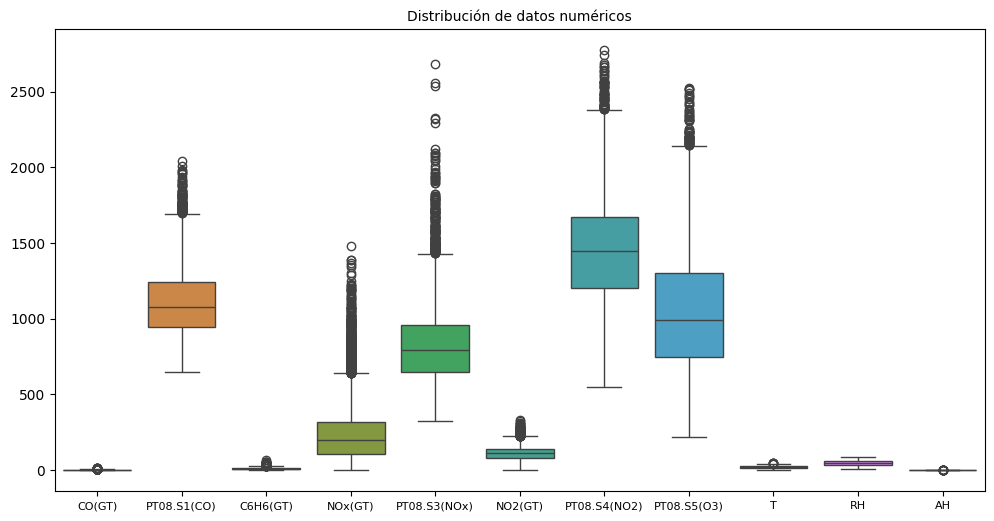

In [24]:
plt.figure(figsize=(12,6))
sns.boxplot(calidad_aire_num.drop('PT08.S2(NMHC)', axis=1))
plt.title("Distribución de datos numéricos", fontsize=10)
plt.xticks(fontsize=8)
plt.show()

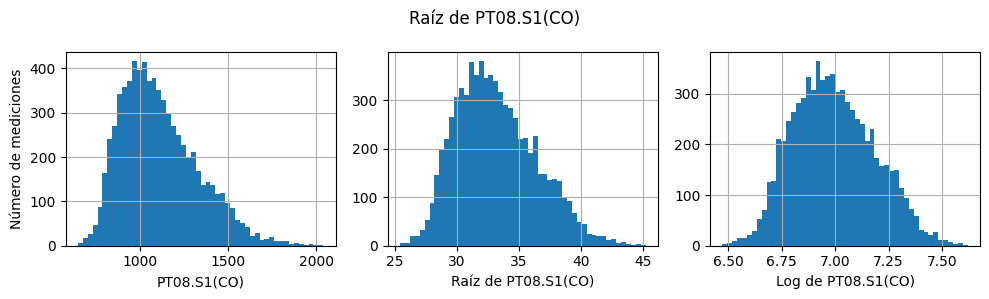

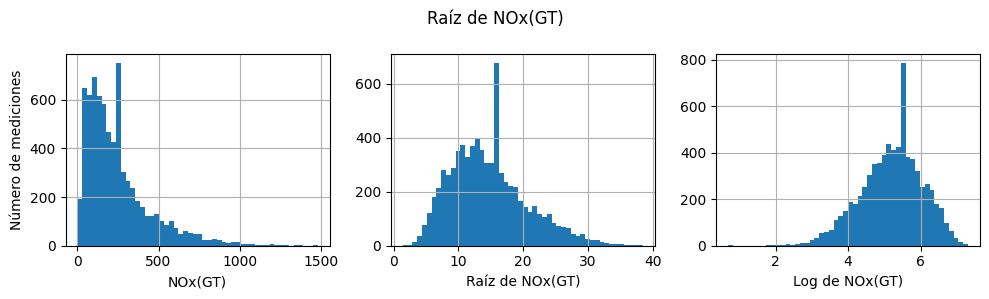

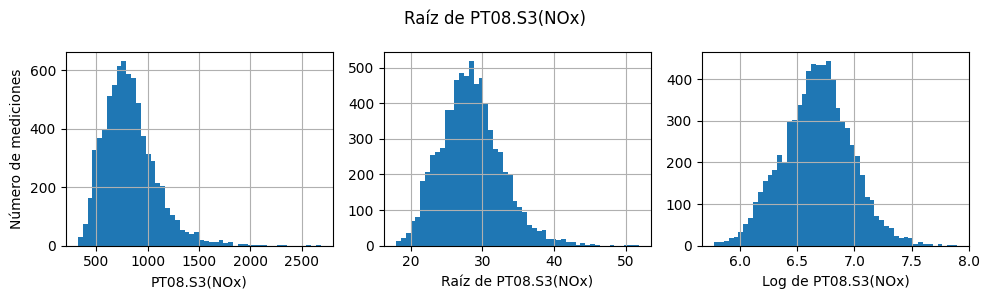

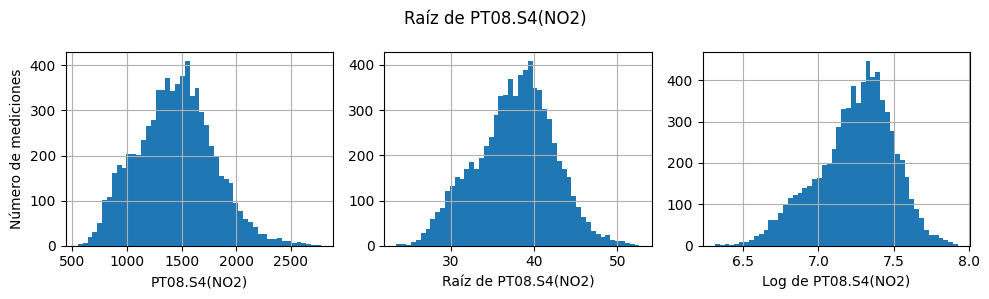

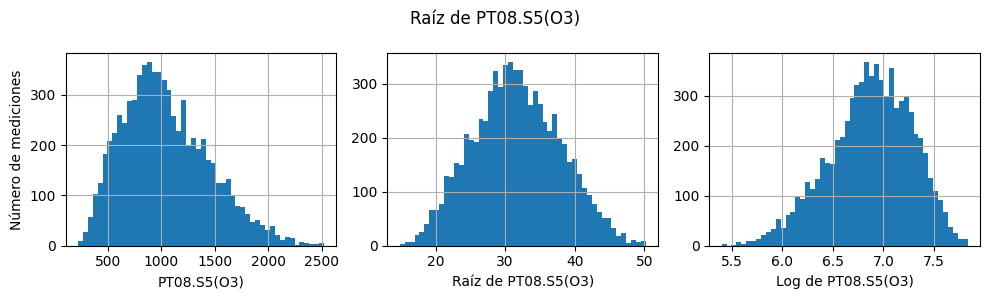

In [25]:
columnas_a_transformar = ["PT08.S1(CO)", "NOx(GT)", "PT08.S3(NOx)","PT08.S4(NO2)", "PT08.S5(O3)"]

for columna in columnas_a_transformar:
    fig, axs = plt.subplots(1, 3, figsize=(10, 3))
    
    calidad_aire_preprocesado[columna].hist(ax=axs[0], bins=50)
    calidad_aire_preprocesado[columna].apply(np.sqrt).hist(ax=axs[1], bins=50)
    calidad_aire_preprocesado[columna].apply(np.log).hist(ax=axs[2], bins=50)
    
    axs[0].set_xlabel(columna)
    axs[1].set_xlabel(f"Raíz de {columna}")
    axs[2].set_xlabel(f"Log de {columna}")
    axs[0].set_ylabel("Número de mediciones")
    
    plt.suptitle(f"Raíz de {columna}")
    plt.tight_layout()
    plt.show()

In [26]:
columnas_sqrt = ["NOx(GT)", "PT08.S4(NO2)"]
columnas_log = ["PT08.S1(CO)", "PT08.S3(NOx)", "PT08.S5(O3)"]

In [27]:
for columna in columnas_log:
    nueva_columna = "log " + columna
    calidad_aire_num.loc[:, nueva_columna] = calidad_aire_num[columna].apply(np.log)

for columna in columnas_sqrt:
    nueva_columna = "sqrt " + columna
    calidad_aire_num.loc[:, nueva_columna] = calidad_aire_num[columna].apply(np.sqrt)

In [28]:
calidad_aire_num.drop(columnas_log, axis=1, inplace=True)
calidad_aire_num.drop(columnas_sqrt, axis=1, inplace=True)

In [29]:
calidad_aire_tiempo = calidad_aire_preprocesado.select_dtypes(include=[object])

In [30]:
calidad_aire_tiempo['datetime'] = pd.to_datetime(
    calidad_aire_tiempo['Date'] + ' ' + calidad_aire_tiempo['Time']
)
calidad_aire_tiempo = calidad_aire_tiempo.drop(['Date', 'Time'], axis=1)

In [31]:
# Assuming you have a datetime column called 'fecha' or 'timestamp'
calidad_aire_tiempo['año'] = calidad_aire_tiempo['datetime'].dt.year
calidad_aire_tiempo['mes'] = calidad_aire_tiempo['datetime'].dt.month
calidad_aire_tiempo['dia'] = calidad_aire_tiempo['datetime'].dt.day
calidad_aire_tiempo['dia_semana'] = calidad_aire_tiempo['datetime'].dt.dayofweek  # 0=Monday, 6=Sunday
calidad_aire_tiempo['hora'] = calidad_aire_tiempo['datetime'].dt.hour
calidad_aire_tiempo['minuto'] = calidad_aire_tiempo['datetime'].dt.minute

In [32]:
calidad_aire_tiempo['hora_sin'] = np.sin(2 * np.pi * calidad_aire_tiempo['hora'] / 24)
calidad_aire_tiempo['hora_cos'] = np.cos(2 * np.pi * calidad_aire_tiempo['hora'] / 24)


calidad_aire_tiempo['mes_sin'] = np.sin(2 * np.pi * calidad_aire_tiempo['mes'] / 12)
calidad_aire_tiempo['mes_cos'] = np.cos(2 * np.pi * calidad_aire_tiempo['mes'] / 12)


calidad_aire_tiempo['dia_semana_sin'] = np.sin(2 * np.pi * calidad_aire_tiempo['dia_semana'] / 7)
calidad_aire_tiempo['dia_semana_cos'] = np.cos(2 * np.pi * calidad_aire_tiempo['dia_semana'] / 7)

In [33]:
calidad_aire_tiempo.drop(['datetime', 'mes', 'dia_semana', 'hora', 'minuto'], axis=1, inplace=True)

In [34]:
calidad_aire_tiempo.head()

,año,dia,hora_sin,hora_cos,mes_sin,mes_cos,dia_semana_sin,dia_semana_cos
0,2004,10,-1.000000,-1.836970e-16,1.0,6.123234e-17,0.974928,-0.222521
1,2004,10,-0.965926,2.588190e-01,1.0,6.123234e-17,0.974928,-0.222521
2,2004,10,-0.866025,5.000000e-01,1.0,6.123234e-17,0.974928,-0.222521
3,2004,10,-0.707107,7.071068e-01,1.0,6.123234e-17,0.974928,-0.222521
4,2004,10,-0.500000,8.660254e-01,1.0,6.123234e-17,0.974928,-0.222521


In [35]:
calidad_aire_preprocesado = pd.concat([calidad_aire_num, calidad_aire_tiempo], axis=1)

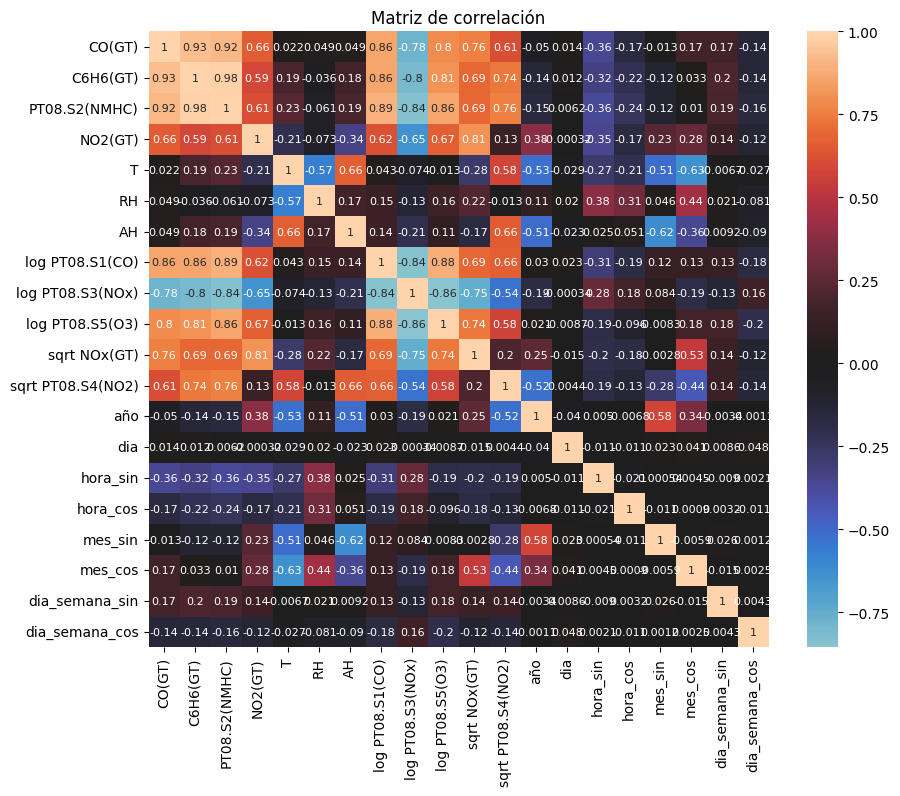

In [36]:
plt.figure(figsize=(10,8))
sns.heatmap(calidad_aire_preprocesado.corr(), annot=True, annot_kws={"size": 8}, center=0)
plt.title("Matriz de correlación")
plt.show()

Se puede notar que existe una correlación muy fuerte de 0.98 entre los features "PT08.S2(NMHC)" y "C6H6(GT)", lo cual agrega redundancia a los datos y se podría eliminar para una mejor eficiencia y uso de los recursos.

In [37]:
calidad_aire_preprocesado.drop(['PT08.S2(NMHC)', 'AH', 'RH', 'T', 'dia', 'año'],axis=1, inplace=True)

In [38]:
y = calidad_aire_preprocesado['CO(GT)']
X = calidad_aire_preprocesado.drop('CO(GT)', axis=1)
del calidad_aire_preprocesado

## Moda

In [59]:
moda = pd.read_csv('Moda/Train.csv')

In [60]:
moda.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
moda_labels = moda.label
moda.drop("label", axis=1, inplace=True)

In [62]:
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.figure(figsize=(4,4))
    plt.imshow(image, cmap="binary")
    plt.axis("off")

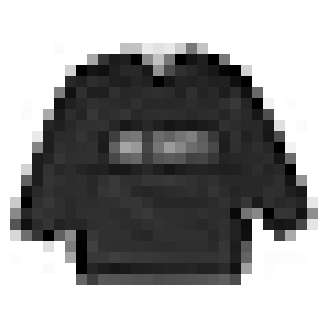

In [63]:
some_digit = moda.iloc[0].values
plot_digit(some_digit)
plt.show()

Se puede notar que en todas las imagenes existen pixeles en blanco en las orillas que no aportan información. Se procede a recortar las imágenes donde el tamaño será de la imagen más larga.

In [64]:
X = moda
y = moda_labels

## Ingresos Anuales

In [3]:
ingresos = pd.read_excel('IngresosPromedioAnual.xlsx')

In [4]:
ingresos.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


<ol>
    <li>age: the age of an individual</li>
    <li>workclass: a general term to represent the employment status of an individual</li>
    <li>fnlwgt: final weight. This is the number of people the census believes the entry represents..</li>
    <li>education: the highest level of education achieved by an individual.</li>
    <li>education­num: the highest level of education achieved in numerical form.</li>
    <li>marital­status: marital status of an individual.</li>
    <li>occupation: the general type of occupation of an individual</li>
    <li>relationship: represents what this individual is relative to others.</li>
    <li>race: Descriptions of an individual’s race</li>
    <li>sex: the sex of the individual</li>
    <li>capital­gain: capital gains for an individual</li>
    <li>capital­loss: capital loss for an individual</li>
    <li>hours­per­week: the hours an individual has reported to work per week</li>
    <li>native­country: country of origin for an individual</li>
</ol>


In [5]:
ingresos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
ingresos_preprocesado = ingresos.drop('education', axis=1)

In [7]:
ingresos_preprocesado["income"] = ingresos_preprocesado["income"].map({"<=50K": 0, ">50K": 1})

In [8]:
del ingresos

In [9]:
ingresos_cat = ingresos_preprocesado.select_dtypes(include=[object])
print("Número de clases por columna:")
for column in ingresos_cat.columns:
    print(f'\t{column}: {ingresos_cat[column].nunique()}')

Número de clases por columna:
	workclass: 9
	marital.status: 7
	occupation: 15
	relationship: 6
	race: 5
	sex: 2
	native.country: 42


In [10]:
for column in ingresos_cat.columns:
    print(f'{column}: {ingresos_cat[ingresos_cat[column] == "?"][column].count()}')

workclass: 1836
marital.status: 0
occupation: 1843
relationship: 0
race: 0
sex: 0
native.country: 583


In [11]:
print(f"Porcentaje de instancias de '?' en workclass: {((ingresos_cat['workclass'] == '?').sum() / len(ingresos_cat))*100:.2f}%")
print(f"Porcentaje de instancias de '?' en workclass: {((ingresos_cat['occupation'] == '?').sum() / len(ingresos_cat))*100:.2f}%")

Porcentaje de instancias de '?' en workclass: 5.64%
Porcentaje de instancias de '?' en workclass: 5.66%


Porque la codificación de países incrementaría mucho la dimensionalidad del conjunto de datos entonces se opta por reemplazar la categoría del país con el Producto Interno Bruto per Capita. El sexo se cambia a 0 y 1 ya que solo hay 2 clases.

La cantidad de instancias que tienen '?' como clase es significante por lo que decide no eliminarse las filas con ese valor ya que pueden significar desempleo y podrían ayudar al modelo.

In [12]:
ingresos_cat.drop(['sex', 'native.country'], axis=1, inplace=True)

In [13]:
categorical_features = ['race', 'occupation', 'marital.status', 'workclass', 'relationship']

for feature in categorical_features:
    contingency_table = pd.crosstab(ingresos_cat[feature], ingresos_preprocesado["income"])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f"\n{feature}:")
    print(f"  Chi2: {chi2:.2f}, p-value: {p_value:.2e}")


race:
  Chi2: 330.92, p-value: 2.31e-70

occupation:
  Chi2: 4031.97, p-value: 0.00e+00

marital.status:
  Chi2: 6517.74, p-value: 0.00e+00

workclass:
  Chi2: 1045.71, p-value: 2.03e-220

relationship:
  Chi2: 6699.08, p-value: 0.00e+00


In [14]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
ingresos_cat_codificado = encoder.fit_transform(ingresos_cat)

In [15]:
ingresos_cat = pd.DataFrame(
    ingresos_cat_codificado, 
    columns=encoder.get_feature_names_out(ingresos_cat.columns),
    index=ingresos_cat.index
)

In [16]:
ingresos_preprocesado['sex'] = ingresos_preprocesado['sex'].map({"Male": 0, "Female": 1})

### Codificación de Países

In [17]:
gdp_per_capita = pd.read_csv('gdp-per-capita.csv')
gdp_1994 = gdp_per_capita[['Country', '1994']]
del gdp_per_capita

In [18]:
gdp_1994[gdp_1994.isnull().any(axis=1)]

,Country,1994
47,Czechoslovakia (Former),NaN
59,Ethiopia (Former),NaN
178,USSR (Former),NaN
182,Yemen Arab Republic (Former),NaN
183,Yemen Democratic (Former),NaN
184,Yugoslavia (Former),NaN


In [19]:
lista_paises_con_gdp = gdp_1994.Country.unique()
for i in ingresos_preprocesado['native.country'].unique():
    if i not in lista_paises_con_gdp:
        print(i)

United-States
?
Vietnam
Taiwan
Trinadad&Tobago
South
Holand-Netherlands
Puerto-Rico
Iran
England
Hong
Dominican-Republic
El-Salvador
Columbia
Yugoslavia
Scotland
Laos
Outlying-US(Guam-USVI-etc)


In [20]:
gdp_1994.Country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Aruba',
       'Australia', 'Austria', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Chile', 'China', 'China, Hong Kong SAR', 'China, Macao SAR',
       'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica',
       "Côte d'Ivoire", 'Cuba', 'Cyprus', 'Czechoslovakia (Former)',
       'D.P.R. of Korea', 'D.R. of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eswatini',
       'Ethiopia (Former)', 'Fiji', 'Finland',
       'Former Nethe

In [21]:
ingresos_preprocesado[ingresos_preprocesado['native.country'] == 'Outlying-US(Guam-USVI-etc)']['native.country'].count()

np.int64(14)

In [22]:
reemplazos = {
    'Puerto-Rico': 'Puerto Rico',
    'United-States': 'United States',
    'Trinadad&Tobago': 'Trinidad and Tobago',
    'Dominican-Republic': 'Dominican Republic',
    'Holand-Netherlands': 'Netherlands',
    'El-Salvador': 'El Salvador',
    'Columbia': 'Colombia',
    'Outlying-US(Guam-USVI-etc)': 'Puerto Rico',
    'Vietnam': 'Viet Nam',
    'Laos': "Lao People's DR",
    'Hong': 'China, Hong Kong SAR',
    'Iran': 'Iran (Islamic Republic of)',
    'South': 'South Africa',
    'England': 'United Kingdom',
    'Scotland': 'United Kingdom'
}
ingresos_preprocesado['native.country'] = ingresos_preprocesado['native.country'].replace(reemplazos)
del reemplazos

In [23]:
ingresos_preprocesado = ingresos_preprocesado[ingresos_preprocesado['native.country'] != 'Yugoslavia']
ingresos_preprocesado = ingresos_preprocesado[ingresos_preprocesado['native.country'] != '?']

In [24]:
ingresos_preprocesado = ingresos_preprocesado.merge(gdp_1994, left_on='native.country', right_on='Country', how='left')
ingresos_preprocesado = ingresos_preprocesado.drop(['native.country', 'Country'], axis=1)
ingresos_preprocesado = ingresos_preprocesado.rename(columns={'1994': 'country'})

In [25]:
ingresos_preprocesado['country'] = ingresos_preprocesado['country'].fillna(12220)

### Codificación de Categorías

In [26]:
ingresos_preprocesado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             31962 non-null  int64  
 1   workclass       31962 non-null  object 
 2   fnlwgt          31962 non-null  int64  
 3   education.num   31962 non-null  int64  
 4   marital.status  31962 non-null  object 
 5   occupation      31962 non-null  object 
 6   relationship    31962 non-null  object 
 7   race            31962 non-null  object 
 8   sex             31962 non-null  int64  
 9   capital.gain    31962 non-null  int64  
 10  capital.loss    31962 non-null  int64  
 11  hours.per.week  31962 non-null  int64  
 12  income          31962 non-null  int64  
 13  country         31962 non-null  float64
dtypes: float64(1), int64(8), object(5)
memory usage: 3.4+ MB


In [27]:
ingresos_preprocesado.describe(include='all')

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income,country
count,31962.000000,31962,3.196200e+04,31962.000000,31962,31962,31962,31962,31962.000000,31962.000000,31962.000000,31962.000000,31962.000000,31962.000000
unique,NaN,9,NaN,NaN,7,15,6,5,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Private,NaN,NaN,Married-civ-spouse,Prof-specialty,Husband,White,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,22273,NaN,NaN,14680,4038,12936,27414,NaN,NaN,NaN,NaN,NaN,NaN
mean,38.578906,NaN,1.897010e+05,10.071303,NaN,NaN,NaN,NaN,0.331800,1064.719605,86.782773,40.415775,0.240567,26060.258468
std,13.662734,NaN,1.057223e+05,2.560543,NaN,NaN,NaN,NaN,0.470867,7300.343262,401.690119,12.345477,0.427434,6182.589596
min,17.000000,NaN,1.228500e+04,1.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,224.564642
25%,28.000000,NaN,1.176180e+05,9.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,40.000000,0.000000,27784.863996
50%,37.000000,NaN,1.783105e+05,10.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,40.000000,0.000000,27784.863996
75%,48.000000,NaN,2.373790e+05,12.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,45.000000,0.000000,27784.863996


### Feature Engineering

In [28]:
ingresos_preprocesado[ingresos_preprocesado['capital.gain'] == 0]['capital.loss'].count()

np.int64(29305)

In [29]:
ingresos_preprocesado['has_capital_gain'] = (ingresos_preprocesado['capital.gain'] > 0).astype(int)
ingresos_preprocesado['has_capital_loss'] = (ingresos_preprocesado['capital.loss'] > 0).astype(int)

In [30]:
ingresos_preprocesado['net_capital'] =ingresos_preprocesado['capital.gain'] - ingresos_preprocesado['capital.loss']

In [31]:
ingresos_preprocesado.drop(['capital.gain', 'capital.loss'], axis=1, inplace=True)

In [32]:
ingresos_num = ingresos_preprocesado.select_dtypes(include=[np.number])
ingresos_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               31962 non-null  int64  
 1   fnlwgt            31962 non-null  int64  
 2   education.num     31962 non-null  int64  
 3   sex               31962 non-null  int64  
 4   hours.per.week    31962 non-null  int64  
 5   income            31962 non-null  int64  
 6   country           31962 non-null  float64
 7   has_capital_gain  31962 non-null  int64  
 8   has_capital_loss  31962 non-null  int64  
 9   net_capital       31962 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 2.4 MB


In [33]:
del ingresos_preprocesado

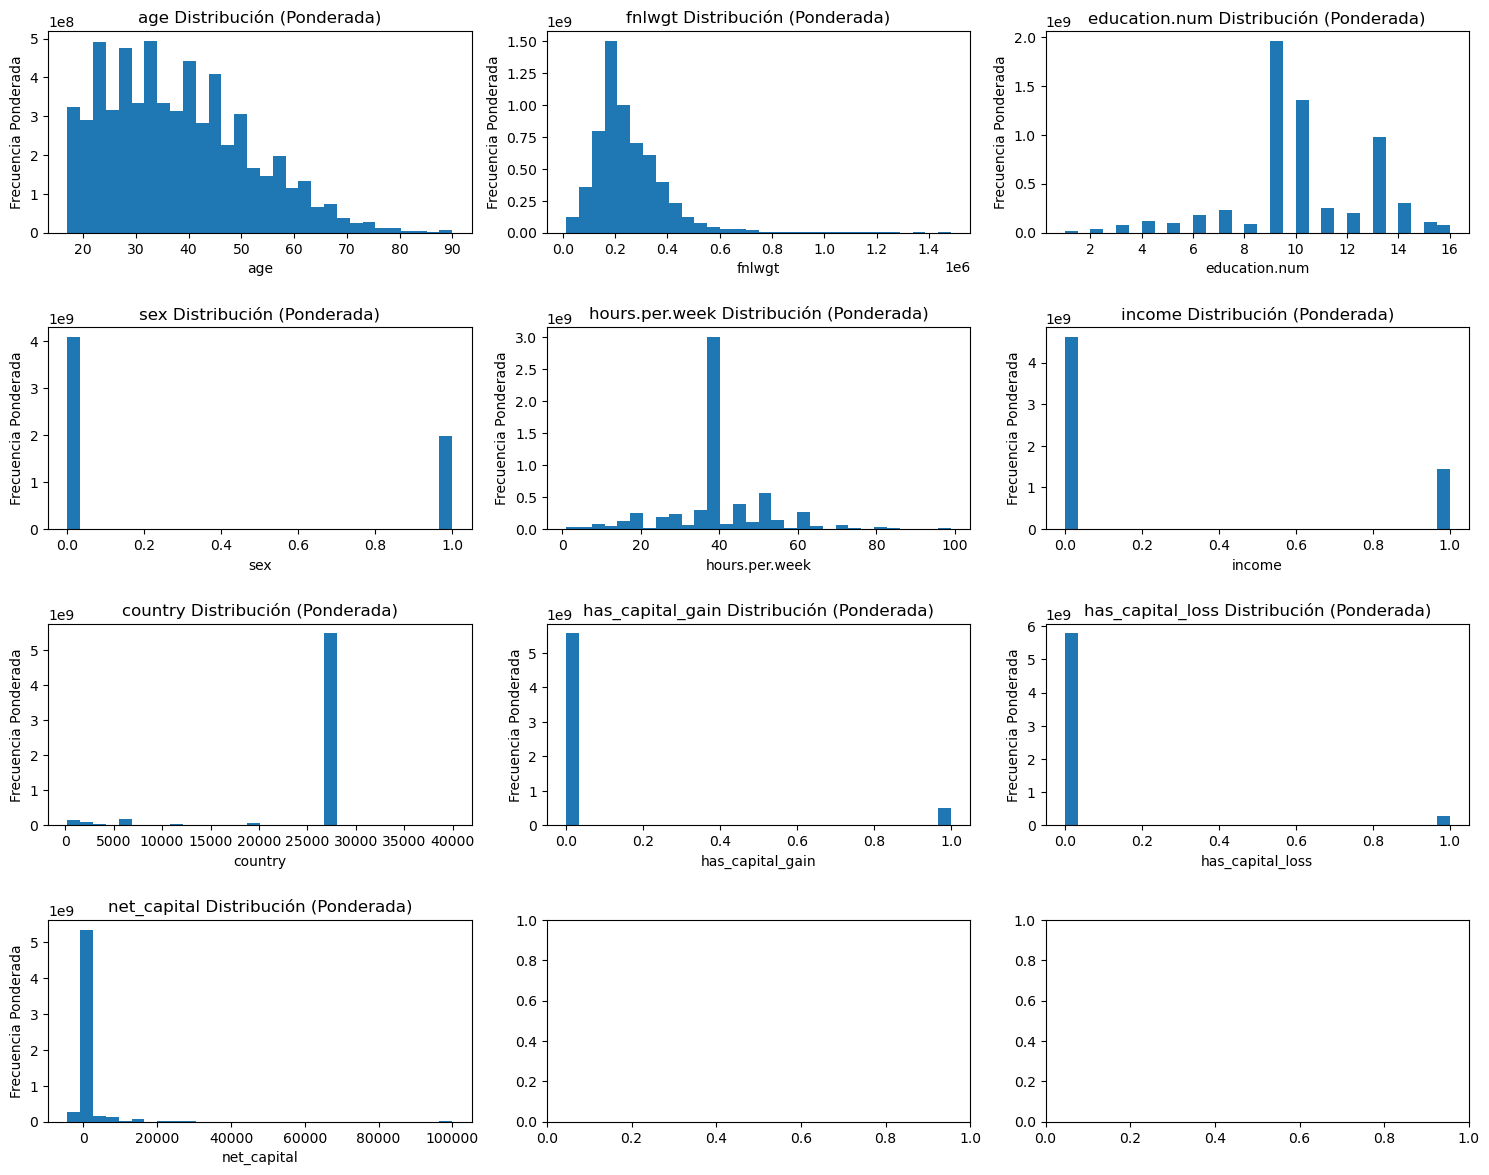

In [34]:
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.ravel()

for i, col in enumerate(ingresos_num.columns):
    axes[i].hist(ingresos_num[col], weights=ingresos_num['fnlwgt'], bins=30)
    axes[i].set_title(f'{col} Distribución (Ponderada)')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia Ponderada')

plt.tight_layout()
plt.show()

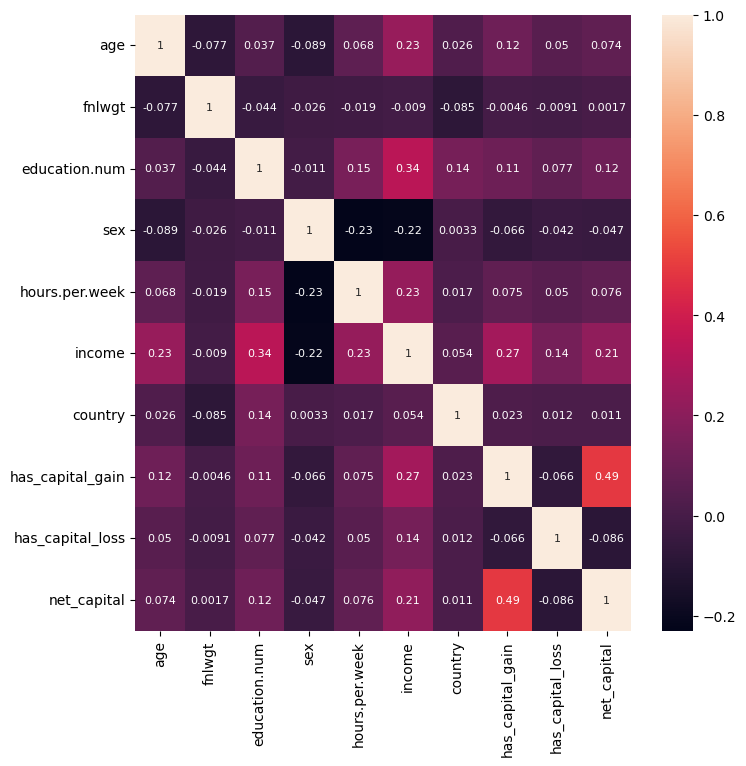

In [35]:
plt.figure(figsize=(8,8))
sns.heatmap(ingresos_num.corr(), annot=True, annot_kws={"size": 8})
plt.show()

In [36]:
ingresos_preprocesado = pd.concat([ingresos_num, ingresos_cat], axis=1)
del ingresos_num
del ingresos_cat

In [37]:
# Elimina los NaN en la columna de Income
ingresos_preprocesado = ingresos_preprocesado.dropna(subset=["income"])

y = ingresos_preprocesado["income"].astype(int).values.reshape(-1,1)
weights = ingresos_preprocesado["fnlwgt"].values.reshape(-1,1)
X = ingresos_preprocesado.drop(["income", "fnlwgt"], axis=1).values
del ingresos_preprocesado

# Modelos

## Regresión Lineal

In [140]:
class OurLinearRegression:
    
    def compute_mse(self, X, y, theta):
        m = len(y)
        y_pred = X.dot(theta)
        mse = (1/m) * np.sum((y_pred - y)**2)
        return mse
        
    def train(self, X, y, X_valid, y_valid, alpha=0.0001, n_iter=1000):
        train_mse_history = []
        valid_mse_history = []
        
        n_features = X.shape[1]
        m = X.shape[0]
        self.theta = np.zeros((n_features, 1))
    
        for i in range(n_iter):
            y_pred = X.dot(self.theta)  # Fixed
            
            grad = (2/m) * X.T.dot(y_pred - y)
            self.theta = self.theta - alpha * grad
            
            train_mse = self.compute_mse(X, y, self.theta)
            valid_mse = self.compute_mse(X_valid, y_valid, self.theta)
            train_mse_history.append(train_mse)
            valid_mse_history.append(valid_mse)
            
            if i % 100 == 0:
                print(f"Iteración {i}, MSE Entrenamiento: {train_mse:.4f}")
                print(f"Iteración {i}, MSE Validación: {valid_mse:.4f}")
    
        return self.theta, train_mse_history, valid_mse_history  # Fixed
    
    def predict(self, X):
        return X.dot(self.theta)

## Regresión Logística

In [38]:
class OurLogisticRegression:
    def __init__(self, lr=0.01, epochs=5000):
        self.lr = lr
        self.epochs = epochs
        self.theta = None
        self.loss_history = []
        self.valid_loss_history = []

    
    def sigmoid(self,z):
        return 1 / (1 + np.exp(-z))

    
    def compute_cost(self,y, y_hat):
        m = len(y)
        return -(1/m) * np.sum(y*np.log(y_hat + 1e-15) + (1-y)*np.log(1-y_hat + 1e-15))

    def fit(self, X, y, X_valid, y_valid, sample_weights=None):
        m, n = X.shape
        # Inicialización con valores pequeños aleatorios
        self.theta = np.random.randn(n,1) * 0.01

        if sample_weights is None:
            sample_weights = np.ones((m, 1))
        else:
            sample_weights = sample_weights.reshape(-1, 1)
        
        
        sample_weights = sample_weights * (m / np.sum(sample_weights))

        for epoch in range(self.epochs):
            z = X.dot(self.theta)
            y_hat = self.sigmoid(z)
            weighted_error = sample_weights * (y_hat - y)
            gradient = (1/m) * X.T.dot(weighted_error)
            self.theta -= self.lr * gradient

            # Guardar loss cada 100 iteraciones
            if epoch % 100 == 0:
                y_hat_valid = self.sigmoid(X_valid.dot(self.theta))
                cost = self.compute_cost(y, y_hat)
                valid_cost = self.compute_cost(y_valid, y_hat_valid)
                self.valid_loss_history.append(valid_cost)
                self.loss_history.append(cost)
                if epoch % 500 == 0:
                    print(f"Epoch {epoch}: Costo = {cost:.4f}")

    def predict_proba(self, X):
        return self.sigmoid(X.dot(self.theta))

    def predict(self, X, threshold=0.5):
        probs = self.predict_proba(X)
        return (probs >= threshold).astype(int)

    def plot_loss(self):
        plt.plot(range(0, self.epochs, 100), self.loss_history, marker='o', label="Training")
        plt.plot(range(0, self.epochs, 100), self.valid_loss_history, marker='^', label="Validation")
        plt.xlabel("Epoch")
        plt.ylabel("Log-Loss")
        plt.title("Evolución de la pérdida durante el entrenamiento")
        plt.legend()
        plt.grid(True)
        plt.show()

## Árboles de Decisión

In [39]:
# Función Gini
def gini(y):
   y = y.astype(int)
   counts = np.bincount(y)
   probabilities = counts / len(y)
   return 1.0 - np.sum(probabilities**2)


# Función Entropía
def entropy(y):
   unique, counts = np.unique(y, return_counts=True)
   probabilities = counts / len(y)
   return -np.sum(probabilities * np.log2(probabilities))


class DecisionTree:
   def __init__(self, max_depth=None, min_samples_split=2, min_impurity_decrease=1e-7, criterion="gini"):
       self.max_depth = max_depth
       self.min_samples_split = min_samples_split
       self.min_impurity_decrease = min_impurity_decrease
       self.criterion = criterion
       self.root = None
       self.n_classes_ = None


   class Node:
       def __init__(self, depth=0):
           self.depth = depth
           self.feature_index = None
           self.threshold = None
           self.left = None
           self.right = None
           self.value = None  
           self.proba = None 


   def _impurity(self, y):
       if self.criterion == "gini":
           return gini(y)
       elif self.criterion == "entropy":
           return entropy(y)
       else:
           raise ValueError("Criterio no válido: usa 'gini' o 'entropy'")


   def _best_split(self, X, y):
       m, n = X.shape
       if m < self.min_samples_split:
           return None, None, None, 0


       parent_impurity = self._impurity(y)
       best_gain = 0.0
       best_idx, best_thr, best_left_mask = None, None, None


       for idx in range(n):
           thresholds = np.unique(X[:, idx])
           for thr in thresholds:
               left_mask = X[:, idx] <= thr
               right_mask = ~left_mask
               if left_mask.sum() == 0 or right_mask.sum() == 0:
                   continue


               y_left, y_right = y[left_mask], y[right_mask]
               imp_left = self._impurity(y_left)
               imp_right = self._impurity(y_right)
               weighted_imp = (len(y_left) * imp_left + len(y_right) * imp_right) / len(y)


               gain = parent_impurity - weighted_imp
               if gain > best_gain:
                   best_gain = gain
                   best_idx = idx
                   best_thr = thr
                   best_left_mask = left_mask


       return best_idx, best_thr, best_left_mask, best_gain


   def _build_tree(self, X, y, depth=0):
       node = self.Node(depth=depth)
       counts = Counter(y)
       total = len(y)
       node.value = max(counts, key=counts.get)
       node.proba = {cls: cnt/total for cls, cnt in counts.items()}


       # condiciones de parada
       if (self.max_depth is not None and depth >= self.max_depth) or len(counts) == 1 or len(y) < self.min_samples_split:
           return node


       feature_idx, thr, left_mask, gain = self._best_split(X, y)
       if feature_idx is None or gain < self.min_impurity_decrease:
           return node


       X_left, y_left, X_right, y_right = X[left_mask], y[left_mask], X[~left_mask], y[~left_mask]
       node.feature_index = feature_idx
       node.threshold = thr
       node.left = self._build_tree(X_left, y_left, depth + 1)
       node.right = self._build_tree(X_right, y_right, depth + 1)
       return node


   def fit(self, X, y):
       X, y = np.array(X), np.array(y)
       self.n_classes_ = len(np.unique(y))
       self.root = self._build_tree(X, y, depth=0)
       return self


   def _predict_one(self, x, node):
       if node.feature_index is None:
           return node.value
       if x[node.feature_index] <= node.threshold:
           return self._predict_one(x, node.left)
       else:
           return self._predict_one(x, node.right)


   def predict(self, X):
       return np.array([self._predict_one(x, self.root) for x in X])


   def _predict_proba_one(self, x, node):
       if node.feature_index is None:
           return node.proba
       if x[node.feature_index] <= node.threshold:
           return self._predict_proba_one(x, node.left)
       else:
           return self._predict_proba_one(x, node.right)


   def predict_proba(self, X):
       probs = []
       for x in X:
           p_dict = self._predict_proba_one(x, self.root)
           p = np.zeros(self.n_classes_)
           for cls, prob in p_dict.items():
               p[cls] = prob
           probs.append(p)
       return np.array(probs)
   
class DecisionTreeRegressor:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    def fit(self, X, y, depth=0):
        self.tree = self._build_tree(X, y, depth)
        return self

    def _build_tree(self, X, y, depth):
        n_samples, n_features = X.shape
        if depth == self.max_depth or n_samples < self.min_samples_split:
            return np.mean(y)

        best_feat, best_thresh, best_mse = None, None, float("inf")
        for feat in range(n_features):
            thresholds = np.unique(X[:, feat])
            for t in thresholds:
                left_mask = X[:, feat] <= t
                right_mask = ~left_mask
                if len(y[left_mask]) == 0 or len(y[right_mask]) == 0:
                    continue
                mse = self._mse_split(y[left_mask], y[right_mask])
                if mse < best_mse:
                    best_feat, best_thresh, best_mse = feat, t, mse

        if best_feat is None:
            return np.mean(y)

        left_mask = X[:, best_feat] <= best_thresh
        right_mask = ~left_mask
        return {
            "feature": best_feat,
            "threshold": best_thresh,
            "left": self._build_tree(X[left_mask], y[left_mask], depth + 1),
            "right": self._build_tree(X[right_mask], y[right_mask], depth + 1)
        }

    def _mse_split(self, y_left, y_right):
        left_mse = np.var(y_left) * len(y_left)
        right_mse = np.var(y_right) * len(y_right)
        return (left_mse + right_mse) / (len(y_left) + len(y_right))

    def _predict_one(self, x, tree):
        if not isinstance(tree, dict):
            return tree
        if x[tree["feature"]] <= tree["threshold"]:
            return self._predict_one(x, tree["left"])
        else:
            return self._predict_one(x, tree["right"])

    def predict(self, X):
        return np.array([self._predict_one(x, self.tree) for x in X])


## Random Forest

In [40]:
class RandomForest:
    def __init__(self, n_estimators=10, max_depth=None, min_samples_split=2, 
                 max_features="sqrt", criterion="gini", random_state=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.max_features = max_features
        self.criterion = criterion
        self.random_state = random_state
        self.trees = []

    def _max_features_num(self, n_features):
        if isinstance(self.max_features, int):
            return self.max_features
        elif self.max_features == "sqrt":
            return max(1, int(np.sqrt(n_features)))
        elif self.max_features == "log2":
            return max(1, int(np.log2(n_features)))
        else:
            return n_features  # usa todas las features

    def fit(self, X, y):
        np.random.seed(self.random_state)
        X = np.array(X) if not isinstance(X, np.ndarray) else X
        y = np.array(y) if not isinstance(y, np.ndarray) else y

        n_samples, n_features = X.shape
        self.n_classes_ = len(np.unique(y))
        self.trees = []

        for i in range(self.n_estimators):
            # Bootstrap: muestreo con reemplazo
            idxs = np.random.choice(n_samples, n_samples, replace=True)
            X_sample = X[idxs]
            y_sample = y[idxs]

            # Selección aleatoria de features
            n_feats = self._max_features_num(n_features)
            feat_idxs = np.random.choice(n_features, n_feats, replace=False)

            # Entrenar un árbol en el subset
            tree = DecisionTree(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split,
                criterion=self.criterion
            )
            tree.fit(X_sample[:, feat_idxs], y_sample)

            # Guardar árbol + features
            self.trees.append((tree, feat_idxs))

        return self

    def predict(self, X):
        X = np.array(X) if not isinstance(X, np.ndarray) else X
        # Predicciones de cada árbol
        tree_preds = np.array([
            tree.predict(X[:, feat_idxs]) for tree, feat_idxs in self.trees
        ])
        # Votación mayoritaria por fila
        preds = [Counter(row).most_common(1)[0][0] for row in tree_preds.T]
        return np.array(preds)

    def predict_proba(self, X):
        X = np.array(X) if not isinstance(X, np.ndarray) else X
        # Promedio de probabilidades de cada árbol
        probs = np.zeros((X.shape[0], self.n_classes_))
        for tree, feat_idxs in self.trees:
            probs += tree.predict_proba(X[:, feat_idxs])
        probs /= len(self.trees)
        return probs

class RandomForestRegressorP:
    def __init__(self, n_estimators=10, max_depth=None, min_samples_split=2, max_features=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.max_features = max_features
        self.trees = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        if self.max_features is None:
            self.max_features = int(np.sqrt(n_features))

        self.trees = []
        for _ in range(self.n_estimators):
            idxs = np.random.choice(n_samples, n_samples, replace=True)
            tree = DecisionTreeRegressor(
                max_depth=self.max_depth, 
                min_samples_split=self.min_samples_split
            )
            tree.fit(X[idxs], y[idxs])
            self.trees.append(tree)
        return self

    def predict(self, X):
        preds = np.array([tree.predict(X) for tree in self.trees])
        return np.mean(preds, axis=0)

## K-Nearest Neighbors

# Entrenamiento

In [ ]:
X_train_full, X_test, y_train_full, y_test, weights_train, weights_test = train_test_split(
    X, y, weights, test_size=0.2, random_state=42, stratify=y
)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42
)

In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42
)

In [ ]:
# Random Forest REG
X_train, X_test, y_train, y_test = train_test_split(
    X.values, y.values, test_size=0.2, random_state=42
)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

X_train_b = np.c_[np.ones((X_train.shape[0],1)), X_train]
X_valid_b = np.c_[np.ones((X_valid.shape[0],1)), X_valid]
X_test_b = np.c_[np.ones((X_test.shape[0],1)), X_test]

## Ingresos Anuales

### Arbol de Desicion

In [42]:
tree = DecisionTree(
   max_depth=8,
   min_samples_split=10,
   criterion="gini"
)
tree.fit(X_train, y_train)

tree_sklearn = DecisionTreeClassifier(
   max_depth=8,
   min_samples_split=10,
   criterion="gini",
   random_state=42
)
tree_sklearn.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,8
,min_samples_split,10
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### Regresión Logística

In [43]:
our_log_model = OurLogisticRegression(lr=0.05, epochs=2000)
our_log_model.fit(X_train_b, y_train, X_valid_b, y_valid)

Epoch 0: Costo = 0.6929
Epoch 500: Costo = 0.3996
Epoch 1000: Costo = 0.3965
Epoch 1500: Costo = 0.3955


In [44]:
sklearn_log_model = LogisticRegression(random_state=42)
sklearn_log_model.fit(X_train, y_train.ravel())

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


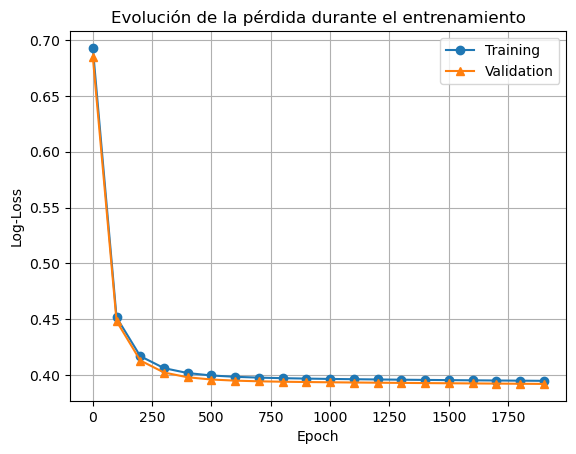

In [45]:
our_log_model.plot_loss()

## Moda

### Random Forest

In [67]:
rf_moda = RandomForest(
    n_estimators=5, 
    max_depth=5, 
    min_samples_split=10, 
    max_features="sqrt", 
    criterion="gini", 
    random_state=42
)
rf_moda.fit(X_train, y_train)

rf_sklearn_moda = RandomForestClassifier(
    n_estimators=5, 
    max_depth=5, 
    min_samples_split=10, 
    max_features="sqrt", 
    criterion="gini", 
    random_state=42
)
rf_sklearn_moda.fit(X_train, y_train)

,n_estimators,5
,criterion,'gini'
,max_depth,5
,min_samples_split,10
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### K-Nearest Neighbors

## Calidad de Aire

### Regresión Lineal

In [144]:
our_reg = OurLinearRegression()
sklearn_reg = LinearRegression()

In [ ]:
theta, train_mse_history, valid_mse_history = our_reg.train(X_train, y_train, X_valid, y_valid, alpha=0.01, n_iter=1000)

In [ ]:
sklearn_reg.fit(X_train, y_train)

In [ ]:
plt.plot(range(1, len(train_mse_history)), train_mse_history[1:], label='Entrenamiento')
plt.plot(range(1, len(valid_mse_history)), valid_mse_history[1:], label='Validación')
plt.xlabel('Iteraciones')
plt.ylabel('MSE')
plt.title('Evolución del MSE durante entrenamiento')
plt.ylim(0, max(train_mse_history)*1.1)
plt.legend()

In [ ]:
sklearn_pred = sklearn_reg.predict(X_test)
our_pred = our_reg.predict(X_test)

In [ ]:
reg = LinearRegression(n_features=1)sklearn_rmse = -cross_val_score(sklearn_reg, X, y, scoring="neg_root_mean_squared_error", cv=10)
pd.Series(sklearn_rmse).describe()

In [ ]:
our_pred[:5]

In [ ]:
sklearn_pred[:5]

### Random Forest

In [48]:
rf_reg_air = RandomForestRegressorP(
    n_estimators=5, 
    max_depth=5
)
rf_reg_air.fit(X_train, y_train)

rf_reg_sklearn_air = RandomForestRegressor(
    n_estimators=5, 
    max_depth=5, 
    random_state=42
)
rf_reg_sklearn_air.fit(X_train, y_train)

,n_estimators,5
,criterion,'squared_error'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


# Métricas

## Ingresos Anuales

In [46]:
def evaluate(y_true, y_pred, y_proba):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1": f1_score(y_true, y_pred),
        "AUC": roc_auc_score(y_true, y_proba)
    }

In [51]:
#Predicciones Arbol de decision
y_pred_tree_income = tree.predict(X_test)
y_proba_tree_income = tree.predict_proba(X_test)[:, 1]

y_pred_sklearn_tree_income = tree_sklearn.predict(X_test)
y_proba_sklearn_tree_income = tree_sklearn.predict_proba(X_test)[:, 1]

#Predicciones Regresion logistica
y_pred_logreg_income = our_log_model.predict(X_test_b)
y_proba_logreg_income = our_log_model.predict_proba(X_test_b)

y_pred_sklearn_logreg_income = sklearn_log_model.predict(X_test)
y_proba_sklearn_logreg_income = sklearn_log_model.predict_proba(X_test)[:, 1]

results = pd.DataFrame({
    "Árbol Propio": evaluate(y_test, y_pred_tree_income, y_proba_tree_income),
    "Árbol sklearn": evaluate(y_test, y_pred_sklearn_tree_income, y_proba_sklearn_tree_income),
    "Regresión Logística Propia": evaluate(y_test, y_pred_tree_income, y_proba_tree_income),
    "Regresión Logística sklearn": evaluate(y_test, y_pred_sklearn_tree_income, y_proba_sklearn_tree_income)
})

results

,Árbol Propio,Árbol sklearn,Regresión Logística Propia,Regresión Logística sklearn
Accuracy,0.834194,0.834037,0.834194,0.834037
Precision,0.729808,0.730435,0.729808,0.730435
Recall,0.493498,0.491547,0.493498,0.491547
F1,0.588829,0.587641,0.588829,0.587641
AUC,0.857482,0.856690,0.857482,0.856690


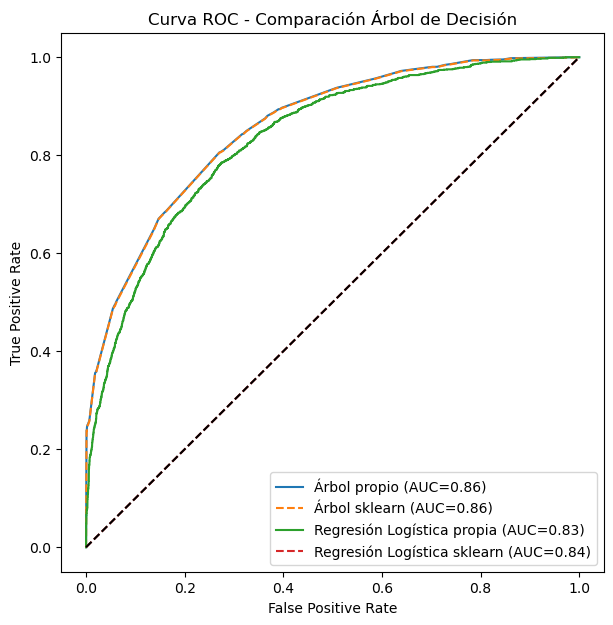

In [52]:
fpr_tree_scratch, tpr_tree_scratch, _ = roc_curve(y_test, y_proba_tree_income)
fpr_tree_sklearn, tpr_tree_sklearn, _ = roc_curve(y_test, y_proba_sklearn_tree_income)

roc_auc__tree_scratch = auc(fpr_tree_scratch, tpr_tree_scratch)
roc_auc__tree_sklearn = auc(fpr_tree_sklearn, tpr_tree_sklearn)

fpr_logreg_scratch, tpr_logreg_scratch, _ = roc_curve(y_test, y_proba_logreg_income)
fpr_logreg_sklearn, tpr_logreg_sklearn, _ = roc_curve(y_test, y_proba_sklearn_logreg_income)

roc_auc_logreg_scratch = auc(fpr_logreg_scratch, tpr_logreg_scratch)
roc_auc__logreg_sklearn = auc(fpr_logreg_sklearn, tpr_logreg_sklearn)

plt.figure(figsize=(7,7))
plt.plot(fpr_tree_scratch, tpr_tree_scratch, label=f"Árbol propio (AUC={roc_auc__tree_scratch:.2f})")
plt.plot(fpr_tree_sklearn, tpr_tree_sklearn, label=f"Árbol sklearn (AUC={roc_auc__tree_sklearn:.2f})", linestyle="--")
plt.plot(fpr_logreg_scratch, tpr_logreg_scratch, label=f"Regresión Logística propia (AUC={roc_auc_logreg_scratch:.2f})")
plt.plot(fpr_logreg_sklearn, fpr_logreg_sklearn, label=f"Regresión Logística sklearn (AUC={roc_auc__logreg_sklearn:.2f})", linestyle="--")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC - Comparación Árbol de Decisión")
plt.legend()
plt.show()

## Calidad Aire

In [51]:
def regression_metrics(y_true, y_pred):
    return {
        "MSE": mean_squared_error(y_true, y_pred),
        "RMSE": mean_squared_error(y_true, y_pred),
        "MAE": mean_absolute_error(y_true, y_pred),
        "R2": r2_score(y_true, y_pred)
    }

In [52]:
y_pred_rf_reg_air= rf_reg_air.predict(X_test)
y_pred_sklearn_rf_reg_air = rf_reg_sklearn_air.predict(X_test)

results_regression = pd.DataFrame({
    "RandomForestScratch": regression_metrics(y_test, y_pred_rf_reg_air),
    "sklearn": regression_metrics(y_test, y_pred_sklearn_rf_reg_air)
})

print(results_regression)

      RandomForestScratch   sklearn
MSE              0.195171  0.195060
RMSE             0.195171  0.195060
MAE              0.302125  0.299564
R2               0.899996  0.900053


## Moda

In [68]:
def to_onehot(y_pred, n_classes):
    proba = np.zeros((len(y_pred), n_classes))
    for i, cls in enumerate(y_pred):
        proba[i, int(cls)] = 1.0
    return proba

def evaluate_multi_class(y_true, y_pred, y_proba, average="macro"):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average=average),
        "Recall": recall_score(y_true, y_pred, average=average),
        "F1": f1_score(y_true, y_pred, average=average),
        "AUC": roc_auc_score(y_true, y_proba, multi_class="ovr", average=average)
    }

           RandomForest Propio   sklearn
Accuracy              0.715917  0.756833
Precision             0.671234  0.762548
Recall                0.715917  0.756833
F1                    0.686144  0.739886
AUC                   0.842176  0.864907


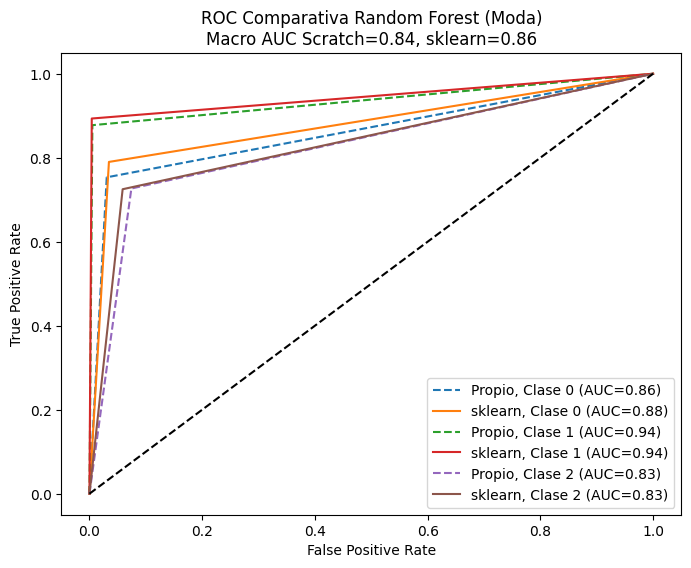

In [69]:
y_pred_rf_moda = rf_moda.predict(X_test)
y_proba_rf_moda = to_onehot(y_pred_rf_moda, n_classes=len(np.unique(y_test)))

y_pred_sklearn_rf_moda = rf_sklearn_moda.predict(X_test)
y_proba_sklearn_rf_moda = to_onehot(y_pred_sklearn_rf_moda, n_classes=len(np.unique(y_test)))

# Datos para Metrica ROC multiclase Random Forest
y_moda_bin = label_binarize(y, classes=np.arange(10))
n_classes = y_moda_bin.shape[1]
y_test_bin_rf_moda = label_binarize(y_test, classes=np.arange(10))

results = pd.DataFrame({
    "RandomForest Propio": evaluate_multi_class(y_test, y_pred_rf_moda, y_proba_rf_moda),
    "sklearn": evaluate_multi_class(y_test, y_pred_sklearn_rf_moda, y_proba_sklearn_rf_moda)
})
print(results)

fpr, tpr, roc_auc = dict(), dict(), dict()
fpr_sklearn, tpr_sklearn, roc_auc_sklearn = dict(), dict(), dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin_rf_moda[:, i], y_proba_rf_moda[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    fpr_sklearn[i], tpr_sklearn[i], _ = roc_curve(y_test_bin_rf_moda[:, i], y_proba_sklearn_rf_moda[:, i])
    roc_auc_sklearn[i] = auc(fpr_sklearn[i], tpr_sklearn[i])

# --- Macro promedio ---
auc_scratch_macro = np.mean(list(roc_auc.values()))
auc_sklearn_macro = np.mean(list(roc_auc_sklearn.values()))

# --- Gráfica comparativa ---
plt.figure(figsize=(8, 6))
for i in range(3):  # mostramos solo 3 clases para claridad
    plt.plot(fpr[i], tpr[i], linestyle="--", 
             label=f"Propio, Clase {i} (AUC={roc_auc[i]:.2f})")
    plt.plot(fpr_sklearn[i], tpr_sklearn[i], linestyle="-", 
             label=f"sklearn, Clase {i} (AUC={roc_auc_sklearn[i]:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Comparativa Random Forest (Moda)\nMacro AUC Scratch={auc_scratch_macro:.2f}, sklearn={auc_sklearn_macro:.2f}")
plt.legend()
plt.show()